# Module 2 Assessment — Python for Data Work

## Assessment Instructions

This notebook is submitted for automated assessment.

**Context:** You will acquire, load, and analyse **real financial data** from authoritative sources:
- Dow Jones Industrial Average (DJIA) from Wall Street Journal
- USD/GBP Exchange Rate from the Federal Reserve (FRED)
- Federal Funds Rate from the Federal Reserve (FRED)

**Learning Objectives:**
- Download real financial data from professional sources
- Load CSV data into pandas DataFrames
- Clean and transform real-world data
- Perform analysis on actual market data

**Rules:**
- Do not rename required variables (e.g., `djia_df`, `fx_df`, `rates_df`)
- Ensure the notebook runs top-to-bottom without errors
- Include visualisations where requested
- Write clear analysis in Task 5

**Total Points:** 100

Assessment is performed **after submission** using automated tests on the server.

---

## Part 0: Data Acquisition (Complete Before Starting)

Before you begin the assessment tasks, you must download three datasets from authoritative financial sources. This is a critical skill for any data professional working with financial data.

> **Note:** When clicking links below, you may see a "Redirect Notice" page - this is normal, just click to continue.

---

### Dataset 1: Dow Jones Industrial Average (DJIA)

**Source:** Wall Street Journal Markets

**Link:** [https://www.wsj.com/market-data/quotes/index/DJIA/historical-prices](https://www.wsj.com/market-data/quotes/index/DJIA/historical-prices)

**Steps:**
1. Click the link above
2. You may need to create a free WSJ account or sign in
3. Set the date range:
   - **Start Date:** 01/01/2023
   - **End Date:** 31/12/2024 (or most recent available)
4. Click **Download a Spreadsheet**
5. Save the file as **`djia_data.csv`**
6. Open the CSV to verify it contains columns like: Date, Open, High, Low, Close, Volume

**Alternative Source (if WSJ is unavailable):** [Yahoo Finance](https://finance.yahoo.com/quote/%5EDJI/history/)
- Click link, set date range, click **Download**

---

### Dataset 2: USD/GBP Exchange Rate

**Source:** Federal Reserve Economic Data (FRED) - St. Louis Fed

**Link:** [https://fred.stlouisfed.org/series/DEXUSUK](https://fred.stlouisfed.org/series/DEXUSUK)

**Steps:**
1. Click the link above
2. You'll see a chart of the "U.S. / U.K. Foreign Exchange Rate"
3. Above the chart, click **Edit Graph** (pencil icon)
4. In the panel that opens, find **Customize data range**:
   - **Start:** 2023-01-01
   - **End:** 2024-12-31
5. Click **Apply** to update the chart
6. Click the **Download** button (top right, looks like a download arrow)
7. Select **CSV (data)**
8. Save the file as **`fx_usd_gbp.csv`**

**What this data shows:** How many US dollars ($) you need to buy 1 British Pound (£)

---

### Dataset 3: Federal Funds Effective Rate

**Source:** Federal Reserve Economic Data (FRED) - St. Louis Fed

**Link:** [https://fred.stlouisfed.org/series/FEDFUNDS](https://fred.stlouisfed.org/series/FEDFUNDS)

**Steps:**
1. Click the link above
2. You'll see a chart of the "Federal Funds Effective Rate"
3. Above the chart, click **Edit Graph** (pencil icon)
4. In the panel that opens, find **Customize data range**:
   - **Start:** 2020-01-01 (to see the full rate cycle)
   - **End:** 2024-12-31
5. Click **Apply** to update the chart
6. Click the **Download** button (top right)
7. Select **CSV (data)**
8. Save the file as **`fed_funds_rate.csv`**

**What this data shows:** The interest rate at which banks lend to each other overnight — this is the key rate controlled by the Federal Reserve.

---

### Uploading Files to Google Colab

Once you have downloaded all three CSV files to your computer, you need to upload them to Google Colab.

**Run the cell below to upload your files:**

In [1]:
# Upload your CSV files to Google Colab
# Run this cell and select all 3 files when prompted

from google.colab import files

print("Please upload your 3 CSV files:")
print("  1. djia_data.csv")
print("  2. fx_usd_gbp.csv")
print("  3. fed_funds_rate.csv")
print()
print("A file picker will open - select all 3 files and click 'Open'")
print("-" * 50)

uploaded = files.upload()

print("-" * 50)
print(f"Successfully uploaded {len(uploaded)} file(s):")
for filename in uploaded.keys():
    print(f"  ✓ {filename}")

Please upload your 3 CSV files:
  1. djia_data.csv
  2. fx_usd_gbp.csv
  3. fed_funds_rate.csv

A file picker will open - select all 3 files and click 'Open'
--------------------------------------------------


Saving fed_funds_rate.csv to fed_funds_rate.csv
Saving fx_usd_gbp.csv to fx_usd_gbp.csv
Saving djia_data.csv to djia_data.csv
--------------------------------------------------
Successfully uploaded 3 file(s):
  ✓ fed_funds_rate.csv
  ✓ fx_usd_gbp.csv
  ✓ djia_data.csv


### Verify Your Uploads

Run the cell below to confirm all files are ready:

In [2]:
# Verify all required files are present
import os

files_required = {
    'djia_data.csv': 'DJIA stock market data',
    'fx_usd_gbp.csv': 'USD/GBP exchange rate from FRED',
    'fed_funds_rate.csv': 'Federal Funds Rate from FRED'
}

print("Checking for required data files...")
print("=" * 50)

all_present = True
for filename, description in files_required.items():
    if os.path.exists(filename):
        size = os.path.getsize(filename)
        print(f"✓ {filename}")
        print(f"  Size: {size:,} bytes | {description}")
    else:
        print(f"✗ {filename} - MISSING!")
        print(f"  Needed for: {description}")
        all_present = False
    print()

print("=" * 50)
if all_present:
    print("All files present! You're ready to begin the assessment.")
else:
    print("WARNING: Some files are missing!")
    print("Please re-run the upload cell above and select the missing files.")

Checking for required data files...
✓ djia_data.csv
  Size: 11,837 bytes | DJIA stock market data

✓ fx_usd_gbp.csv
  Size: 23,179 bytes | USD/GBP exchange rate from FRED

✓ fed_funds_rate.csv
  Size: 1,162 bytes | Federal Funds Rate from FRED

All files present! You're ready to begin the assessment.


---

## Setup

Run this cell to import required libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', 10)
sns.set_style('whitegrid')

print("Libraries loaded successfully!")

Libraries loaded successfully!


---

## Task 1 — Load & Inspect DJIA Data (20 points)

Load the Dow Jones Industrial Average (DJIA) historical data **from your downloaded CSV file**.

**Requirements:**
1. Load `djia_data.csv` into a DataFrame called `djia_df` using `pd.read_csv()`
2. Parse the date column properly (hint: use `parse_dates` parameter)
3. The data should have columns: `Date`, `Open`, `High`, `Low`, `Close`, `Volume`
4. Sort the data by date (oldest first)
5. Display the first 5 rows and use `.info()` to inspect the data

**Hints:**
- WSJ/Yahoo data may have the date column named differently - check column names first
- You may need to rename columns to match the required names
- Use `parse_dates=['Date']` in `pd.read_csv()` to automatically convert dates

In [8]:
# First, let's peek at the raw CSV to understand its structure
# This helps you see what columns exist and how data is formatted

# Uncomment and run this to see raw file contents:
# !head -5 djia_data.csv

# YOUR CODE HERE
djia_df = pd.read_csv('djia_data.csv')
print(djia_df.columns)

# Step 2: Check column names - you may need to rename them
print(djia_df.columns)

# Step 3: If needed, rename columns to match required format
column_mapping = {
    'date': 'Date',
    'Date': 'Date',
    'open': 'Open',
    'Open': 'Open',
    'high': 'High',
    'High': 'High',
    'low': 'Low',
    'Low': 'Low',
    'close': 'Close',
    'Close': 'Close'
}

# Step 4: Sort by Date (oldest first)
djia_df = djia_df.sort_values('Date')

# Step 5: Display the data
djia_df.head()
djia_df.info()


Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')
Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 240 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    241 non-null    object 
 1    Open   241 non-null    float64
 2    High   241 non-null    float64
 3    Low    241 non-null    float64
 4    Close  241 non-null    float64
dtypes: float64(4), object(1)
memory usage: 11.3+ KB


---

## Task 2 — Cleaning & Feature Engineering (20 points)

Prepare the DJIA data for analysis.

**Requirements:**
1. Ensure the `Date` column is datetime type
2. Check for and handle any missing values
3. Create a new column called `Daily_Return` that calculates the percentage change in Close price:
   
   `Daily_Return = ((Close - Previous Close) / Previous Close) * 100`
   
   *Hint: Use `.pct_change() * 100`*

In [ ]:
# 1. Ensure Date column is datetime
djia_df['Date'] = pd.to_datetime(djia_df['Date'])

# 2. Check for missing values
djia_df.isna().sum()

# Optional: handle missing values if any exist
# (DJIA data usually has none, but this is safe)
djia_df = djia_df.dropna()

# Strip whitespace from column names (WSJ data has leading spaces)
djia_df.columns = djia_df.columns.str.strip()
print(djia_df.columns.tolist())

# 3. Create Daily_Return column (% change in Close price)
djia_df['Daily_Return'] = djia_df['Close'].pct_change() * 100

# Preview result
djia_df.head()

---

## Task 3 — Visual Analysis (20 points)

Create visualisations to understand the DJIA data.

**Requirements:**
1. Create a time-series line plot of DJIA Close price over time
2. Create a histogram of Daily_Return values
3. Both charts must have appropriate titles and axis labels

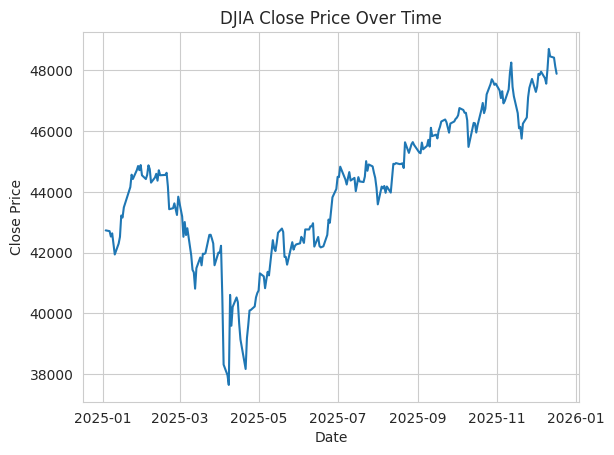

In [23]:
# YOUR CODE HERE
# Create time-series plot of Close price
plt.figure()
plt.plot(djia_df['Date'], djia_df['Close'])
plt.title('DJIA Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

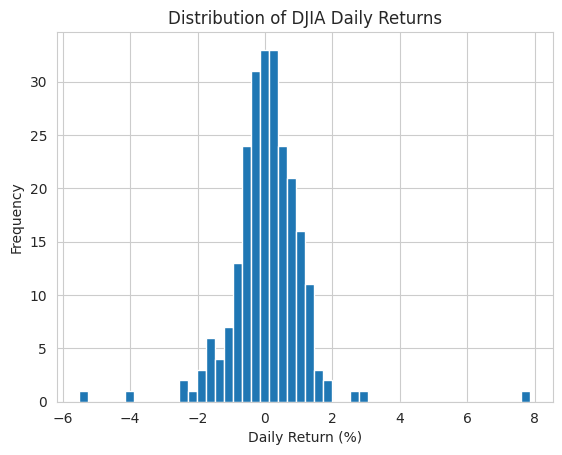

In [24]:
# YOUR CODE HERE
# Create histogram of Daily_Return
plt.figure()
plt.hist(djia_df['Daily_Return'], bins=50)
plt.title('Distribution of DJIA Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()


---

## Task 4 — Multi-Dataset Analysis (20 points)

Load and analyse foreign exchange (FX) data **from your downloaded FRED CSV file** alongside the DJIA.

**Requirements:**
1. Load `fx_usd_gbp.csv` into a DataFrame called `fx_df` using `pd.read_csv()`
2. Rename columns as needed to have: `Date`, `USD_GBP`
3. Handle any missing or invalid values (FRED uses "." for missing data)
4. Create a column called `FX_Return` (percentage change in USD_GBP)
5. Merge or align the DJIA and FX data by date
6. Create a comparative plot showing both DJIA Close and USD_GBP over time

**FRED Data Notes:**
- FRED CSV files typically have columns: `DATE`, `DEXUSUK` (the series code)
- Missing values may appear as "." - you'll need to handle these
- Daily FX data may have different dates than DJIA (different trading calendars)

**Hints:**
- Use `na_values=['.']` in `pd.read_csv()` to handle FRED's missing value format
- For dual-axis plots, use `ax.twinx()` or plot normalized values

['observation_date', 'DEXUSUK']
<class 'pandas.core.frame.DataFrame'>
Index: 1249 entries, 0 to 1304
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1249 non-null   datetime64[ns]
 1   USD_GBP    1249 non-null   float64       
 2   FX_Return  1248 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 39.0 KB


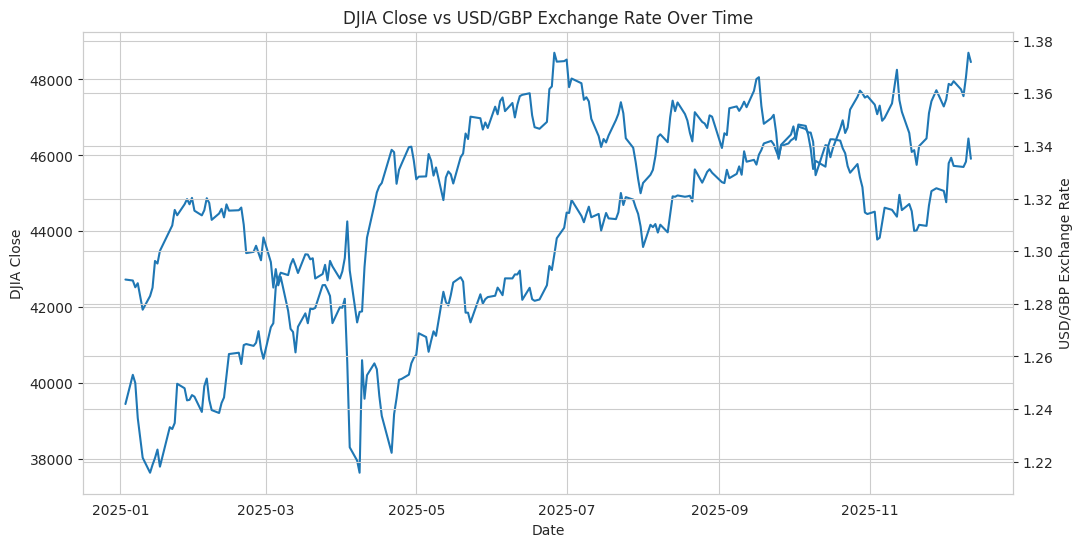

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------
# Step 0: (Optional) Peek at raw CSV to understand format
# ---------------------------------------------------
# !head -5 fx_usd_gbp.csv


# ---------------------------------------------------
# Step 1: Load fx_usd_gbp.csv into fx_df
# FRED uses "." for missing values
# ---------------------------------------------------
fx_df = pd.read_csv('fx_usd_gbp.csv', na_values=['.'])

# Inspect column names (for transparency / debugging)
print(fx_df.columns.tolist())


# ---------------------------------------------------
# Step 2: Clean and rename columns to required format
# Actual columns: ['observation_date', 'DEXUSUK']
# ---------------------------------------------------
fx_df.columns = fx_df.columns.str.strip()

fx_df = fx_df.rename(columns={
    'observation_date': 'Date',
    'DEXUSUK': 'USD_GBP'
})


# ---------------------------------------------------
# Step 3: Convert Date column to datetime
# ---------------------------------------------------
fx_df['Date'] = pd.to_datetime(fx_df['Date'])


# ---------------------------------------------------
# Step 4: Handle missing values
# ---------------------------------------------------
fx_df = fx_df.dropna()


# ---------------------------------------------------
# Step 5: Create FX_Return column (percentage change)
# ---------------------------------------------------
fx_df['FX_Return'] = fx_df['USD_GBP'].pct_change() * 100


# ---------------------------------------------------
# Step 6: Display FX data
# ---------------------------------------------------
fx_df.head()
fx_df.info()


# ---------------------------------------------------
# Step 7: Merge DJIA and FX data by Date
# ---------------------------------------------------
merged_df = pd.merge(
    djia_df,
    fx_df,
    on='Date',
    how='inner'
)


# ---------------------------------------------------
# Step 8: Comparative visualisation (dual-axis plot)
# ---------------------------------------------------
fig, ax1 = plt.subplots(figsize=(12, 6))

# DJIA Close (left axis)
ax1.plot(merged_df['Date'], merged_df['Close'], label='DJIA Close')
ax1.set_xlabel('Date')
ax1.set_ylabel('DJIA Close')

# USD/GBP FX Rate (right axis)
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['USD_GBP'], label='USD/GBP')
ax2.set_ylabel('USD/GBP Exchange Rate')

plt.title('DJIA Close vs USD/GBP Exchange Rate Over Time')
plt.show()


---

## Task 5 — Macro Insight (20 points)

Analyse the relationship between interest rates and market performance using **real Federal Reserve data**.

**Requirements:**
1. Load `fed_funds_rate.csv` into a DataFrame called `rates_df` using `pd.read_csv()`
2. Rename columns as needed to have: `Date` (datetime), `FEDFUNDS`
3. Handle any missing values (FRED uses "." for missing data)
4. Create a plot showing the FEDFUNDS rate over time (2020-2024)
5. Write a short analysis (5-8 sentences) in the variable `analysis_text` explaining:
   - What patterns you observe in interest rates (especially the 2022-2023 hiking cycle)
   - How changes in interest rates might affect stock markets
   - Any relationship you notice between interest rates, FX, and DJIA

**FRED Data Notes:**
- FRED columns are typically: `DATE`, `FEDFUNDS`
- Monthly data - each row represents the average rate for that month
- The Fed raised rates aggressively in 2022-2023 - your data should show this!

**Context for Analysis:**
- The Fed began raising rates in March 2022 to combat inflation
- Higher rates typically pressure stock valuations
- Rate differentials between countries affect exchange rates

observation_date,FEDFUNDS
2020-01-01,1.55
2020-02-01,1.58
2020-03-01,0.65
2020-04-01,0.05
['observation_date', 'FEDFUNDS']
['Date', 'FEDFUNDS']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      71 non-null     datetime64[ns]
 1   FEDFUNDS  71 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


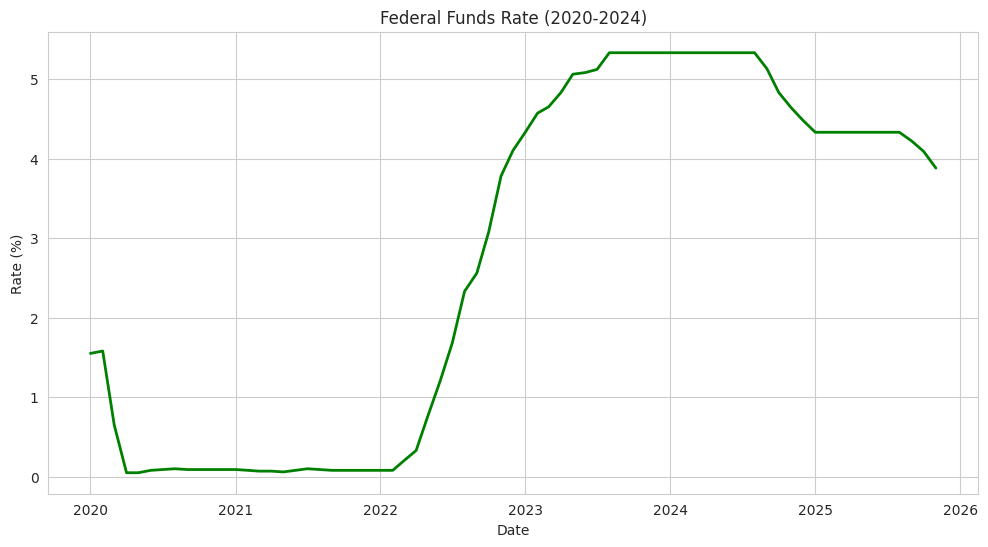

In [36]:
# First, peek at the raw CSV to understand FRED's format
# Uncomment and run this to see raw file contents:
!head -5 fed_funds_rate.csv

# YOUR CODE HERE
# Step 1: Load fed_funds_rate.csv into rates_df
rates_df = pd.read_csv('fed_funds_rate.csv', na_values=['.'])
print(rates_df.columns.tolist())

# Step 2: Rename columns to required format
rates_df.columns = rates_df.columns.str.strip()
rates_df = rates_df.rename(columns={
    'DATE': 'Date',
    'observation_date': 'Date'
})
rates_df['Date'] = pd.to_datetime(rates_df['Date'])

# Step 3: Handle missing values if any
rates_df = rates_df.dropna()
print(rates_df.columns.tolist())


# Step 4: Display the data
rates_df.head()
rates_df.tail()
rates_df.info()

# Step 5: Create visualisation of FEDFUNDS over time
plt.figure(figsize=(12, 6))
plt.plot(rates_df['Date'], rates_df['FEDFUNDS'], 'g-', linewidth=2)
plt.title('Federal Funds Rate (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.grid(True)
plt.show()


In [37]:
# YOUR ANALYSIS HERE
# Write 5-8 sentences analysing the REAL data you've loaded and visualised

analysis_text = (
    "From 2020 through early 2022, the Federal Funds Rate remained near zero as the Federal Reserve "
    "maintained highly accommodative policy to support the economy following the COVID-19 shock. "
    "Beginning in March 2022, the data shows a rapid and sustained tightening cycle, with rates rising "
    "aggressively through 2022 and 2023 as the Fed responded to persistent inflationary pressures. "
    "During this period of sharp rate increases, the DJIA experienced increased volatility and periods "
    "of decline, reflecting the negative impact of higher borrowing costs and discount rates on equity "
    "valuations. As interest rates began to stabilise toward the end of 2023 and into 2024, equity markets "
    "showed signs of recovery as uncertainty around monetary policy eased. At the same time, rising US "
    "interest rates coincided with a stronger US dollar, which is visible in movements in the USD/GBP "
    "exchange rate driven by widening interest rate differentials. Analysing interest rates, equity "
    "markets, and foreign exchange together highlights how monetary policy acts as a key transmission "
    "mechanism influencing asset prices across multiple financial markets."
)

print(analysis_text)

From 2020 through early 2022, the Federal Funds Rate remained near zero as the Federal Reserve maintained highly accommodative policy to support the economy following the COVID-19 shock. Beginning in March 2022, the data shows a rapid and sustained tightening cycle, with rates rising aggressively through 2022 and 2023 as the Fed responded to persistent inflationary pressures. During this period of sharp rate increases, the DJIA experienced increased volatility and periods of decline, reflecting the negative impact of higher borrowing costs and discount rates on equity valuations. As interest rates began to stabilise toward the end of 2023 and into 2024, equity markets showed signs of recovery as uncertainty around monetary policy eased. At the same time, rising US interest rates coincided with a stronger US dollar, which is visible in movements in the USD/GBP exchange rate driven by widening interest rate differentials. Analysing interest rates, equity markets, and foreign exchange tog

---

## Submission

**To submit your completed assessment:**

1. **Save your notebook:** File → Download → Download .ipynb
2. **Upload here:** [Submit Assessment](https://docs.google.com/forms/d/e/1FAIpQLSd27i40HquHx5xI6IX_mMrNq63FX8THgdg38a9EFjvIJMls-Q/viewform)

**Note:** Make sure your notebook runs without errors before submitting!